# Composite Waveforms

In [1]:
import numpy as np

from pulser import Pulse
from pulser.waveforms import BlackmanWaveform, RampWaveform, CompositeWaveform, ConstantWaveform

When creating a `Sequence`, it's usually preferable to divide it into a stream of simple pulses. However, this is not always convenient, as the natural breaking point in the `amplitude` and `detuning` waveforms may not always match. 

In these cases, the `CompositeWaveform` allows for the creation of a more complex waveform by concatenation of multiple, smaller waveforms. Here's an example of how to use it:

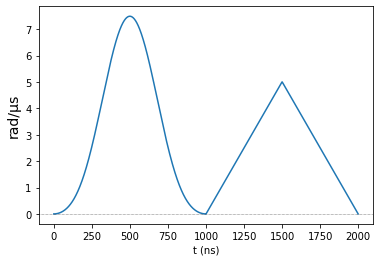

Composite pulse duration:  2000
Composite pulse area:  5.641592653589793


In [2]:
# Defining simple waveforms
pi_pulse = BlackmanWaveform(1000, np.pi)   # Blackman pi-pulse of 1us
up = RampWaveform(500, 0, 5)
down = RampWaveform(500, 5, 0)

# Creating the CompositeWaveform
comp_wf = CompositeWaveform(pi_pulse, up, down)
comp_wf.draw()

# All usual metrics are still availabe
print("Composite pulse duration: ", comp_wf.duration)
print("Composite pulse area: ", comp_wf.integral)

Say that this waveform modulates the amplitude, but alongside it we would like a detuning in the form of a `RampWaveform`, going from $-10$ to $2$ rad/µs. Without the composite waveform, we would be forced to calculate the detuning values at $t=1000$ ns and $t=1500$ ns, in order to create three separate ramps. Instead, we can make a single ramp and use it to create a single pulse:

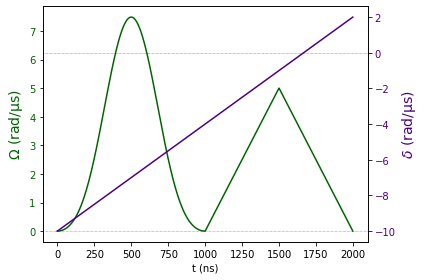

In [3]:
detuning_ramp = RampWaveform(comp_wf.duration, -10, 2)

pulse = Pulse(comp_wf, detuning_ramp, phase=0)
pulse.draw()